<a href="https://colab.research.google.com/github/dhairyachandra/KDM_Spring_2021/blob/main/ICP_3/ICP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Triplet Extraction 

Text =  Twenty percent electric motors are pulled from an assembly line
Twenty -> nummod
percent -> compound
electric -> amod
motors -> nsubjpass
are -> auxpass
pulled -> ROOT
from -> prep
an -> det
assembly -> compound
line -> pobj
***********************
The triplet of the given sentence is:  motors , electric pull , line
***********************


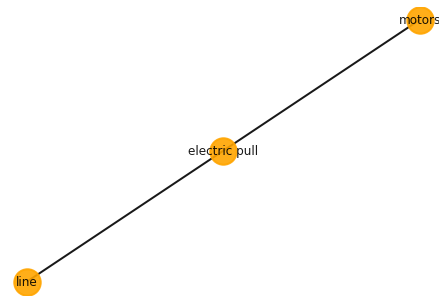

In [23]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

# This function is used to import text data and spliting the words

def getSentences(text):
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]

# Function used to print word and token Example: "Twenty -> nummod"

def printToken(token):
    print(token.text, "->", token.dep_)

def appendChunk(original, chunk):
    return original + ' ' + chunk

# Function to define all relation candidate which is used to define the given text input 

def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

# Function to define all construction candidate which is used to define the given text input 

def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

# This function will pass subject, object, relation, subject construction and object contruction and print triplets of the sentence

def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''

# Printing the triplets of the given sentence

    print("***********************")
    print ("The triplet of the given sentence is: ", subject.strip(), ",", relation.strip(), ",", object.strip())
    print("***********************")
    return (subject.strip(), relation.strip(), object.strip())
   

# Function used to return object pairs from the sentence by using NLP_model function

def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)

# This function is used to plot node graph of triplets 

def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, edge_color='black', width=2, linewidths=2,
            node_size=700, node_color='orange', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

if __name__ == "__main__":

# This is sample input text

    text = "Twenty percent electric motors are pulled from an assembly line"

    sentences = getSentences(text)
    nlp_model = spacy.load('en_core_web_sm')

    triples = []
    print ("Text = ", text)
    # printing the relation and construction candidate
    for sentence in sentences:
        triples.append(processSentence(sentence))

# Ploting the nodes of triplets

    printGraph(triples)

# WordNet Tasks

In [28]:
import nltk
nltk.download('wordnet')

from nltk.corpus import wordnet as wn
# unambiguous word
wn.synsets('motorcar')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[Synset('car.n.01')]

In [12]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [25]:
# ambiguous word
wn.synsets('printer')

[Synset('printer.n.01'), Synset('printer.n.02'), Synset('printer.n.03')]

In [26]:
for synset in wn.synsets('printer'):
    print("\tLemma: {}".format(synset.name()))
    print("\tDefinition: {}".format(synset.definition()))
    print("\tExample: {}".format(synset.examples()))
    print()

	Lemma: printer.n.01
	Definition: someone whose occupation is printing
	Example: []

	Lemma: printer.n.02
	Definition: (computer science) an output device that prints the results of data processing
	Example: []

	Lemma: printer.n.03
	Definition: a machine that prints
	Example: []



In [27]:
for synset in wn.synsets('printer'):
    print(synset.name(), ' -> ', synset.lemmas())

printer.n.01  ->  [Lemma('printer.n.01.printer'), Lemma('printer.n.01.pressman')]
printer.n.02  ->  [Lemma('printer.n.02.printer')]
printer.n.03  ->  [Lemma('printer.n.03.printer'), Lemma('printer.n.03.printing_machine')]


## Hyponym — a more specific concept


In [39]:
machine_that_prints = wn.synset('printer.n.03')
sorted([lemma.name() for synset in machine_that_prints.hyponyms() for lemma in synset.lemmas()])

['Addressograph',
 'addressing_machine',
 'character-at-a-time_printer',
 'character_printer',
 'electrostatic_printer',
 'impact_printer',
 'line-at-a-time_printer',
 'line_printer',
 'page-at-a-time_printer',
 'page_printer',
 'printer',
 'serial_printer',
 'thermal_printer',
 'typesetting_machine']

## Hypernym — a more general concept.


In [32]:
[lemma.name() for synset in  machine_that_prints.hypernyms() for lemma in synset.lemmas()]

['machine']

In [33]:
machine_that_prints.root_hypernyms()

[Synset('entity.n.01')]

In [34]:
[synset.name() for synset in machine_that_prints.hypernym_paths()[0]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'artifact.n.01',
 'instrumentality.n.03',
 'device.n.01',
 'machine.n.01',
 'printer.n.03']

## Meronym — denotes a part of something


In [42]:
tree = wn.synset('tree.n.01')

# part_meronyms() - obtains parts

tree.part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [38]:
# substance_meronyms() - obtains substances

tree.substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

## Holonym — denotes a membership to something

In [43]:
wn.synset('atom.n.01').part_holonyms()

[Synset('chemical_element.n.01'), Synset('molecule.n.01')]

In [44]:
wn.synset('hydrogen.n.01').substance_holonyms()

[Synset('water.n.01')]

## Entailment — denotes how verbs are involved

In [45]:
wn.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]